In [4]:
import pandas as pd
movies = pd.read_csv('data/movies_metadata.csv')
ratings = pd.read_csv('data/ratings.csv')

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [6]:
# remove unneccessary fields
ratings = ratings.drop('timestamp', 1)

ratings[ratings.isna().any(axis=1)]


,userId,movieId,rating


In [4]:
len(ratings)

26024289

In [5]:
len(ratings['userId'].unique())

270896

In [6]:
len(ratings['movieId'].unique())

45115

In [3]:
# avg number of anime rated per user
import statistics
ratings_per_user = ratings.groupby('userId')['rating'].count()
statistics.mean(ratings_per_user.tolist())

NameError: name 'ratings' is not defined

In [2]:
# distribution of ratings per user
# (we may want to exclude users without many data points)
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_user.hist(bins=20, range=(0,500))

NameError: name 'ratings' is not defined

most users have rated fewer than 100 movies

In [9]:
# avg number of ratings given per anime
ratings_per_movie = ratings.groupby('movieId')['rating'].count()
statistics.mean(ratings_per_movie.tolist())

576.8433780339134

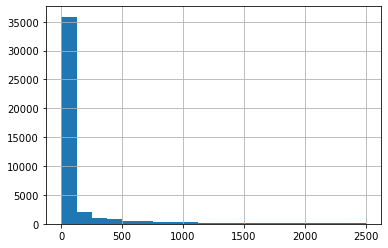

In [10]:
# distribution of ratings per movie
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_movie.hist(bins=20, range=(0,2500))

most movies received less than 500 ratings

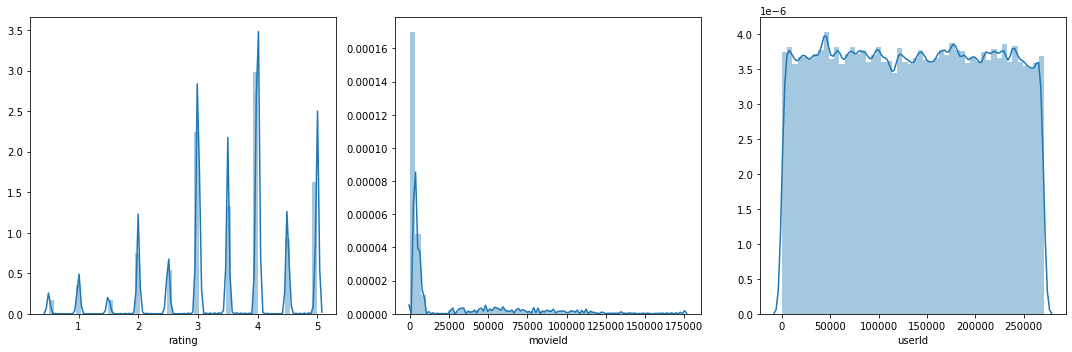

In [11]:
# Each column has a normal distribution (no left or right-skewed)
# Each column should have the same value range
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns# Visualize the plot
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.distplot(ratings.rating, ax=ax[0])
sns.distplot(ratings.movieId, ax=ax[1])
sns.distplot(ratings.userId, ax=ax[2])
plt.tight_layout()
plt.show()

In [12]:
# Import the library
from sklearn.preprocessing import power_transform# Extract the specific column and convert it as a numpy array
X = ratings[['rating', 'movieId', 'userId']].values# Transform the data
X_transformed = power_transform(X, method='yeo-johnson')

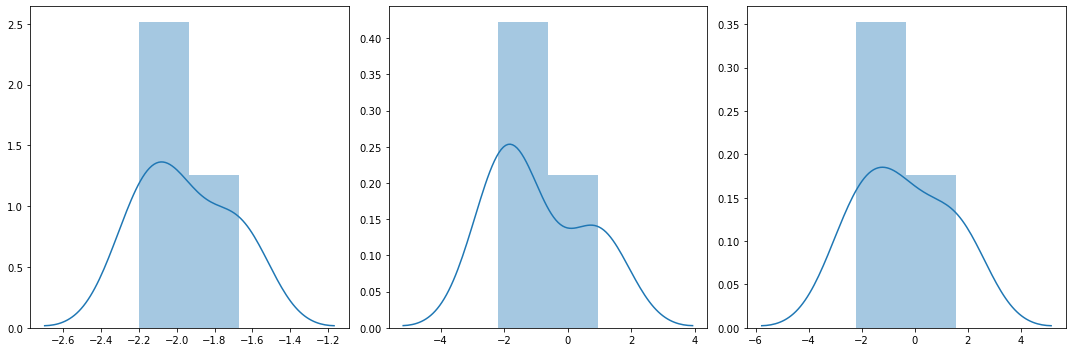

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.distplot(X_transformed[0], ax=ax[0])
sns.distplot(X_transformed[1], ax=ax[1])
sns.distplot(X_transformed[2], ax=ax[2])
plt.tight_layout()
plt.show()

In [14]:
# Import the library
from sklearn.preprocessing import MinMaxScaler# Instantiate the object
scaler = MinMaxScaler()# Fit and transform the data
X_transformed = scaler.fit_transform(X_transformed)

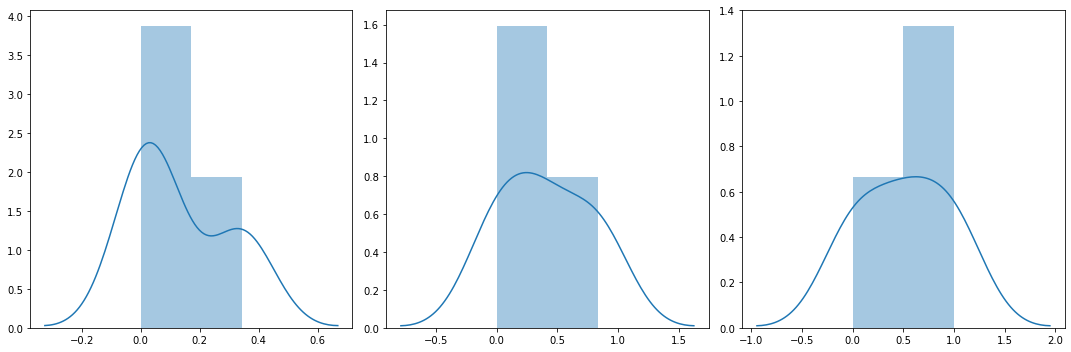

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.distplot(X_transformed[0], ax=ax[0])
sns.distplot(X_transformed[1], ax=ax[1])
sns.distplot(X_transformed[2], ax=ax[2])
plt.tight_layout()
plt.show()

In [16]:
# Import the library
import numpy as np
from sklearn.cluster import KMeans# To make sure our work becomes reproducible
inertia = []# Iterating the process
for i in range(2, 10):
  # Instantiate the model
    model = KMeans(n_clusters=i)
  # Fit The Model
    model.fit(X_transformed)
  # Extract the error of the model
    inertia.append(model.inertia_)# Visualize the model

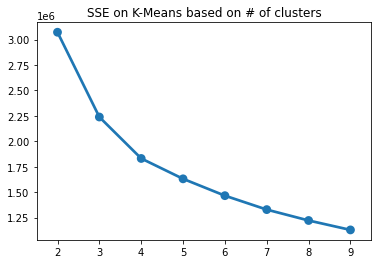

In [17]:
sns.pointplot(x=list(range(2, 10)), y=inertia)
plt.title('SSE on K-Means based on # of clusters')
plt.show()

In [18]:
from kneed import KneeLocator

kl = KneeLocator( range(2, 10), inertia, curve="convex", direction="decreasing")
kl.elbow
# inertia

4

In [19]:
# To make sure our work becomes reproducible
np.random.seed(42)# Instantiate the model
model = KMeans(n_clusters=4)# Fit the model
model.fit(X_transformed)# Predict the cluster from the data and save it
cluster = model.predict(X_transformed)# Add to the dataframe and show the result
ratings['cluster'] = cluster
ratings

,userId,movieId,rating,cluster
0,1,110,1.0,2
1,1,147,4.5,0
2,1,858,5.0,0
3,1,1221,5.0,0
4,1,1246,5.0,0
...,...,...,...,...
26024284,270896,58559,5.0,1
26024285,270896,60069,5.0,1
26024286,270896,63082,4.5,1
26024287,270896,64957,4.5,1


In [20]:
for i in range(4):
    print("Cluster:", i)
    print('num of users:')
    users = list(ratings[ratings['cluster'] == i]['userId'].values)
    print(len(np.unique(users)))
    print('num of movies:')
    movies = list(ratings[ratings['cluster'] == i]['movieId'].values)
    print(len(np.unique(movies)))
    print()

Cluster: 0
num of users:
115286
num of movies:
26567

Cluster: 1
num of users:
150165
num of movies:
27575

Cluster: 2
num of users:
113271
num of movies:
37530

Cluster: 3
num of users:
146911
num of movies:
36630



In [21]:
cluster_0 = ratings.loc[ratings['cluster'].isin([0])]
cluster_1 = ratings.loc[ratings['cluster'].isin([1])]
cluster_2 = ratings.loc[ratings['cluster'].isin([2])]
cluster_3 = ratings.loc[ratings['cluster'].isin([3])]

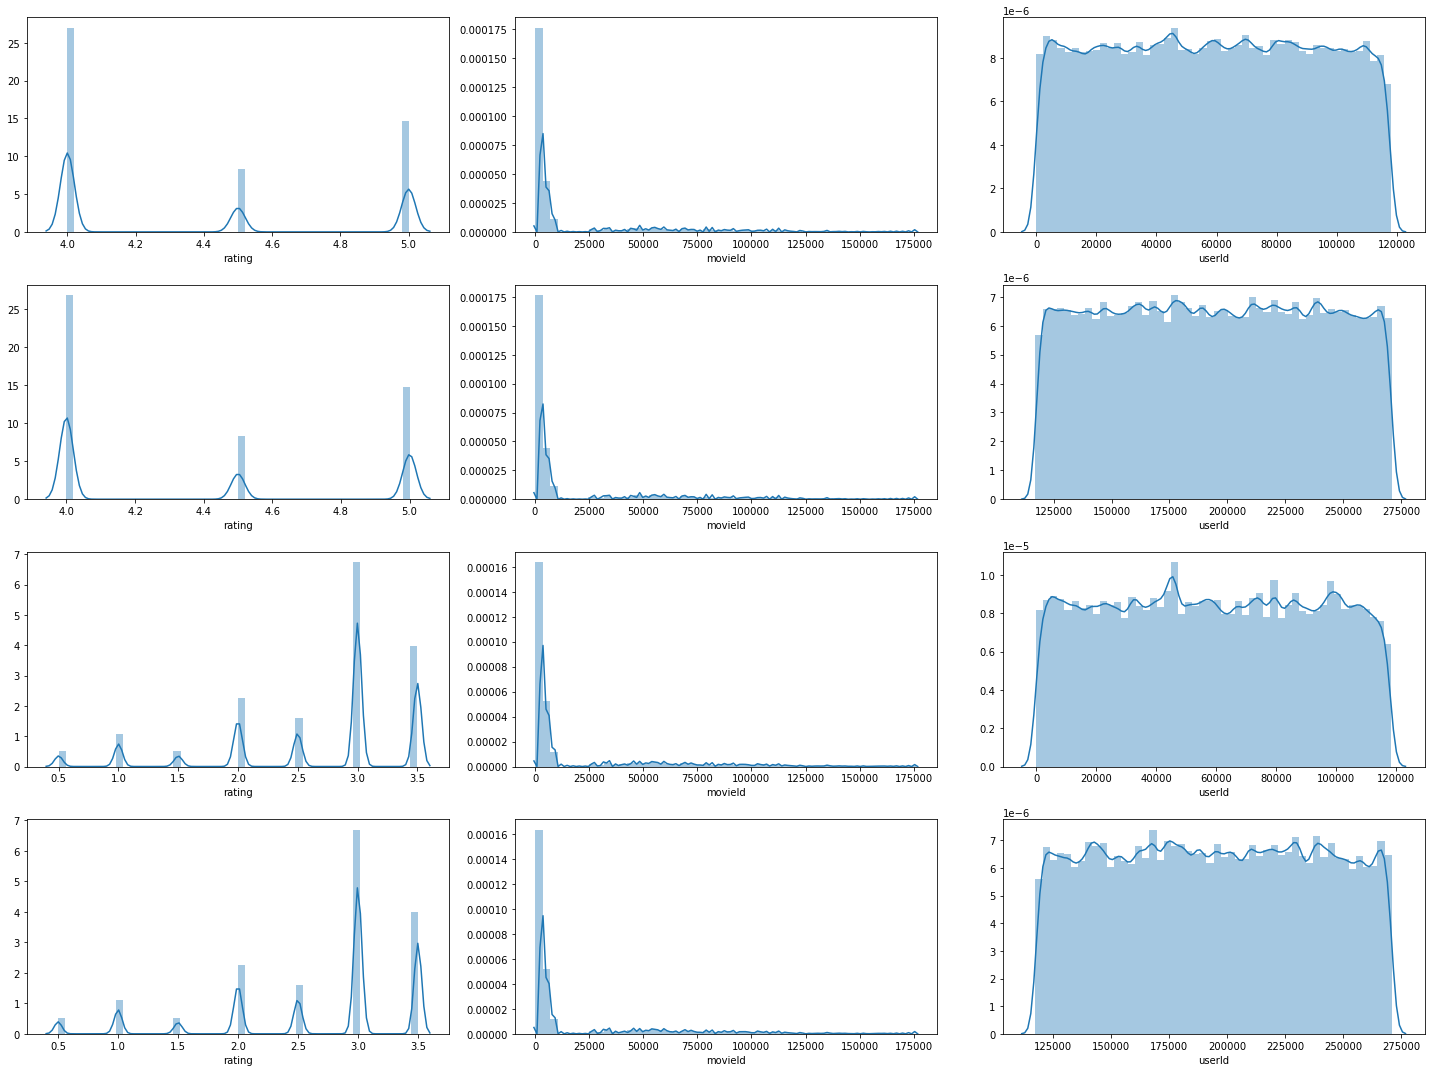

In [22]:
fig, ax = plt.subplots(4, 3, figsize=(20,15))
clusters = [cluster_0, cluster_1, cluster_2, cluster_3]
for i in range (4):
    sns.distplot(clusters[i].rating, ax=ax[i][0])
    sns.distplot(clusters[i].movieId, ax=ax[i][1])
    sns.distplot(clusters[i].userId, ax=ax[i][2])
plt.tight_layout()
plt.show()

In [23]:
ratings.to_csv('data/clustered_ratings.csv')